In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from acquire import *
from prepare_nlp_josh import *
from modeling import *
from explore_viz import *
import env

In [2]:
#These download may need to be run for the NLTK library:

#nltk.download('omw-1.4')
#nltk.download("punkt")
#nltk.download("stopwords")
#nltk.download('averaged_perceptron_tagger')
#nltk.download('tagsets')
#nltk.download("maxent_ne_chunker")
#nltk.download("words")
#nltk.download("book") #big download

In [3]:
#Get a list of github repo names
links = get_links()

In [4]:
#Run this to get new data
df = get_repos(links.href)

In [5]:
#Performs cleaning, tokenization and stemming
df = big_func_to_pre_data(df)

In [6]:
#Additional stopwords
more_stopwords = ['stopswords', 'blackjack', 'java', 'cards', 'split', 'ace', 'variables', 'conditional', 'statements', 'loops', 'functions', 'object-oriented programming', 'syntax', 'comments', 'libraries', 'frameworks']

In [7]:
#Removes stopwords
df['readme_stem_no_swords'] = df['readme_stem'].apply(remove_stopwords, extra_words=more_stopwords)

### Split data

In [8]:
#Seperates data for exploration and testing
train, val, test = train_validate(df)

In [9]:
#Sets global variable to pass into funcitons
target_col = "language"

In [10]:
#Seperates target column for modeling
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test(train, val, test, target_col)

### Explore the data

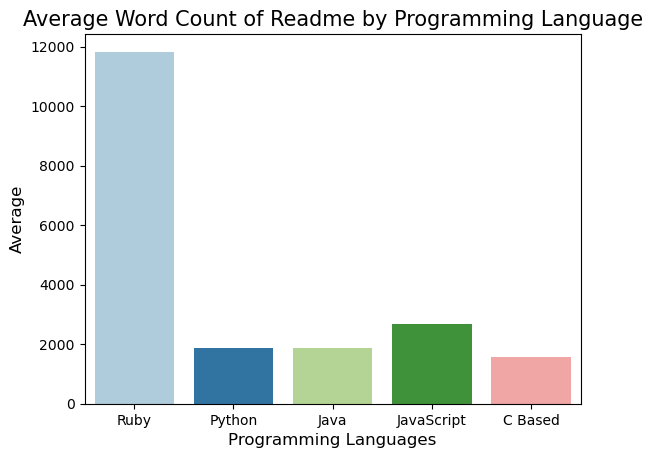

In [11]:
explore_visual_1(train)

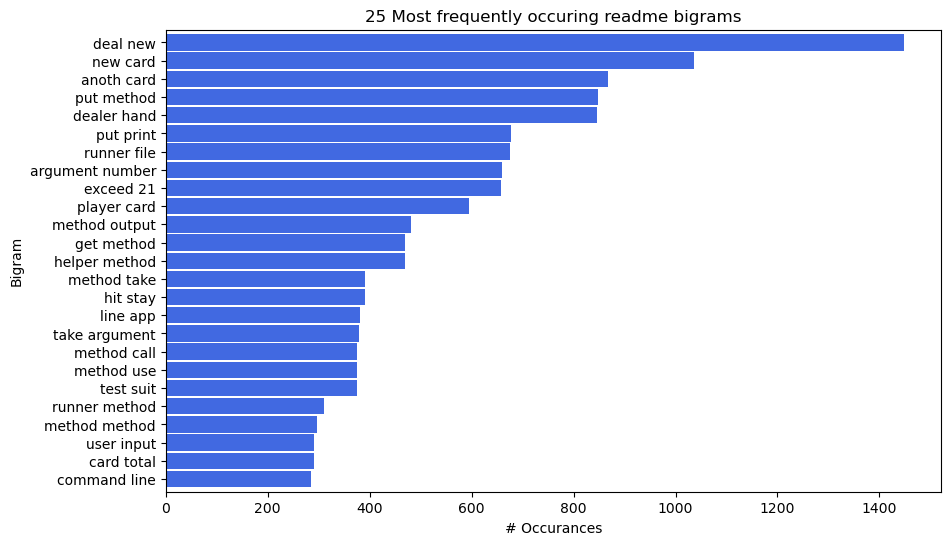

In [12]:
explore_visual_2(train)

###  Logistic Regression Modeling

In [13]:
X_train, X_val, X_test = vectorize_data(X_train, X_val, X_test)

In [14]:
train_score0, val_score0 = lr_mod(X_train, y_train, X_val, y_val, print_scores = True)

Accuracy for Logistic Regression classifier on training set:   0.9222
Accuracy for Logistic Regression classifier on validation set: 0.7417


### Decision Tree Modeling

In [15]:
train_score1, val_score1 = dec_tree(X_train, y_train, X_val, y_val, print_scores =True)

Accuracy for Decision Tree classifier on training set:   0.8556
Accuracy for Decision Tree classifier on validation set: 0.7667


### Random Forest Modeling

In [16]:
train_score2, val_score2 = rand_forest(X_train, y_train, X_val, y_val, print_scores =True)

Accuracy for Random Forest classifier on training set:   0.8056
Accuracy for Random Forest classifier on validation set: 0.7333


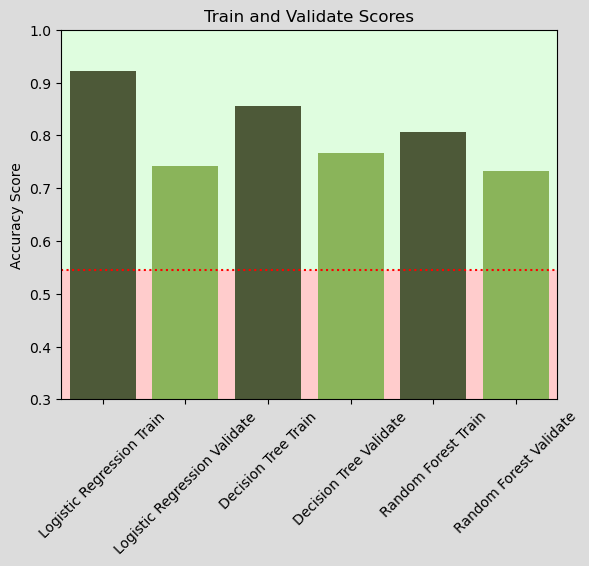

In [17]:
plot_model_scores(train_score0, val_score0, train_score1, val_score1, train_score2, val_score2, y_train)

### Final Test of Decision Tree Model

           Model  Accuracy on Train  Accuracy on Validate  Accuracy on Test
0  Decision Tree             0.8556                0.7667            0.7867


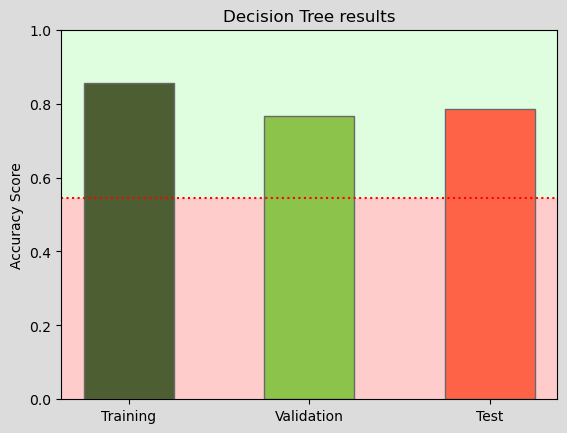

<Figure size 600x600 with 0 Axes>

In [18]:
final_test(X_train, y_train, X_val, y_val, X_test, y_test)